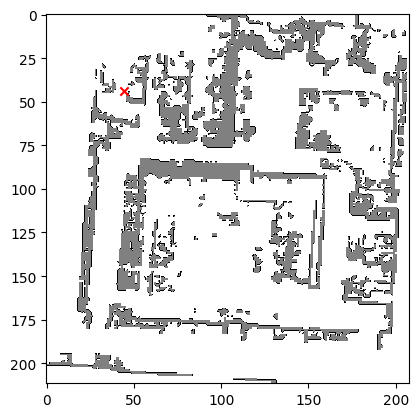

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

# Read the matrix from the file
matrix = np.loadtxt('map.txt')

# Define the colors for different values in the matrix
colors = ['white', 'black', 'gray']

# Create a colormap using the defined colors
cmap = matplotlib.colors.ListedColormap(colors)

# Plot the matrix
plt.imshow(matrix, cmap=cmap)

# Mark the point (64, 126)
plt.scatter(-82+126, -20+64, color='red', marker='x')

# Show the plot
plt.show()

In [2]:
import heapq

# 定义节点类
class Node:
    def __init__(self, position, parent=None):
        self.position = position
        self.parent = parent
        self.g = 0  # 从起始节点到当前节点的实际代价
        self.h = 0  # 从当前节点到目标节点的估计代价
        self.f = 0  # f = g + h

    def __lt__(self, other):
        return self.f < other.f

# 定义A*寻路算法函数
def astar_search(start, goal, grid):
    open_list = []
    closed_list = []

    # 创建起始节点和目标节点
    start_node = Node(start)
    goal_node = Node(goal)

    # 将起始节点加入open_list
    heapq.heappush(open_list, start_node)

    # 定义移动方向
    directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]

    while open_list:
        # 从open_list中取出f值最小的节点
        current_node = heapq.heappop(open_list)

        # 判断是否到达目标节点
        if current_node.position == goal_node.position:
            path = []
            while current_node:
                path.append(current_node.position)
                current_node = current_node.parent
            return path[::-1]

        # 将当前节点加入closed_list
        closed_list.append(current_node)

        # 遍历当前节点的邻居节点
        for direction in directions:
            neighbor_position = (current_node.position[0] + direction[0], current_node.position[1] + direction[1])

            # 判断邻居节点是否在网格范围内
            if neighbor_position[0] < 0 or neighbor_position[0] >= len(grid) or neighbor_position[1] < 0 or neighbor_position[1] >= len(grid[0]):
                continue

            # 判断邻居节点是否为障碍物
            if grid[neighbor_position[0]][neighbor_position[1]] == 100:
                continue

            # 创建邻居节点
            neighbor_node = Node(neighbor_position, current_node)

            # 计算邻居节点的g值和h值
            neighbor_node.g = current_node.g + 1
            neighbor_node.h = abs(neighbor_position[0] - goal_node.position[0]) + abs(neighbor_position[1] - goal_node.position[1])
            neighbor_node.f = neighbor_node.g + neighbor_node.h

            # 判断邻居节点是否已经在open_list或closed_list中
            if neighbor_node in closed_list:
                continue

            if neighbor_node in open_list:
                # 如果邻居节点已经在open_list中，比较当前路径是否更优
                existing_node = open_list[open_list.index(neighbor_node)]
                if neighbor_node.g < existing_node.g:
                    existing_node.g = neighbor_node.g
                    existing_node.parent = neighbor_node.parent
            else:
                # 如果邻居节点不在open_list中，将其加入open_list
                heapq.heappush(open_list, neighbor_node)

    # 如果open_list为空，表示无法找到路径
    return None

# 测试示例
grid = [
    [0, 0, 0, 0, 0],
    [0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0]
]

start = (0, 0)
goal = (4, 4)

path = astar_search(start, goal, grid)
print(path)


[(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (3, 3), (3, 4), (4, 4)]


In [3]:
import numpy as np

# Read the matrix from the file
matrix = np.loadtxt('map.txt')

# Print the matrix
print(matrix)


[[-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 ...
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]


In [4]:
# Replace all occurrences of -1 with 100 in the matrix
matrix[matrix == -1] = 100

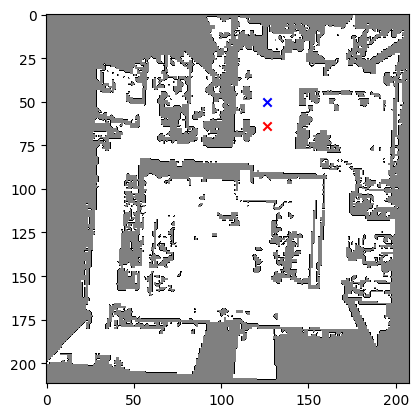

In [8]:
# Define the colors for different values in the matrix
colors = ['white', 'black', 'gray']

# Create a colormap using the defined colors
cmap = matplotlib.colors.ListedColormap(colors)

# Plot the matrix
plt.imshow(matrix, cmap=cmap)

# Mark the point (64, 126)
plt.scatter(126, 64, color='red', marker='x')
plt.scatter(126, 50, color='blue', marker='x')

# Show the plot
plt.show()


In [10]:
path = astar_search((126, 64), (126, 70), matrix)

KeyboardInterrupt: 

In [ ]:
# Plot the matrix
plt.imshow(matrix, cmap=cmap)

# Mark the point (64, 126)
plt.scatter(126, 64, color='red', marker='x')
plt.scatter(50, 80, color='blue', marker='x')

# Plot the path
x = [point[0] for point in path]
y = [point[1] for point in path]
plt.plot(x, y, color='green')

# Show the plot
plt.show()


In [ ]:
unique_numbers = np.unique(matrix)
count = len(unique_numbers)
print(count)


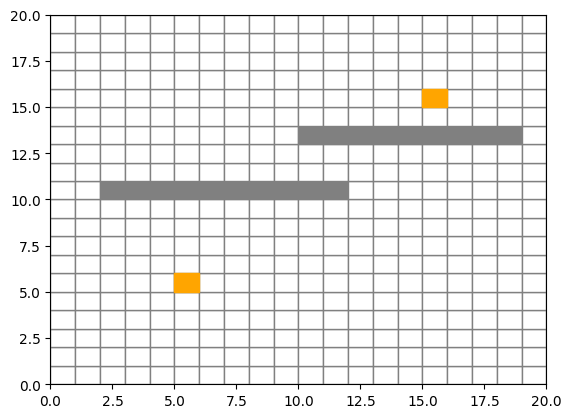

In [2]:
import matplotlib.pyplot as plt
import math
from collections import deque
from matplotlib.patches import Rectangle

MAP_SIZE = 20
SQRT_2 = math.sqrt(2)

def pow2(a):
    return a*a


# 点的定义
class Vector2:
    x = 0
    y = 0

    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __add__(self, other):
        return Vector2(self.x + other.x, self.y + other.y)

    def __eq__(self, other):
        return self.x == other.x and self.y == other.y


# 树结构，用于回溯路径
class Vector2Node:
    pos = None  # 当前的x、y位置
    frontNode = None    # 当前节点的前置节点
    childNodes = None   # 当前节点的后置节点们
    g = 0   # 起点到当前节点所经过的距离
    h = 0   # 启发值
    D = 1

    def __init__(self, pos):
        self.pos = pos
        self.childNodes = []

    def f(self):
        return self.g + self.h

    def calcGH(self, targetPos):
        self.g = self.frontNode.g + math.sqrt(pow2(self.pos.x - self.frontNode.pos.x) + pow2(self.pos.y - self.frontNode.pos.y))
        dx = abs(targetPos.x - self.pos.x)
        dy = abs(targetPos.y - self.pos.y)
        self.h = (dx + dy + (SQRT_2 - 2) * min(dx, dy)) * self.D 


NEIGHBOR_DISES = [ Vector2(1, 0), Vector2(1, 1), Vector2(0, 1), Vector2(-1, 1), Vector2(-1, 0), Vector2(-1, -1), Vector2(0, -1), Vector2(1, -1)]


# 地图
class Map:
    map = None  # 地图，0是空位，1是障碍
    startPoint = None   # 起始点
    endPoint = None # 终点

    tree = None # 已经搜寻过的节点，是closed的集合
    foundEndNode = None # 寻找到的终点，用于判断算法结束

    addNodeCallback = None

    def __init__(self, startPoint, endPoint):
        self.startPoint = startPoint
        self.endPoint = endPoint
        row = [0]*MAP_SIZE
        self.map = []
        for i in range(MAP_SIZE):
            self.map.append(row.copy())

    # 判断当前点是否超出范围
    def isOutBound(self, pos):
        return pos.x < 0 or pos.y < 0 or pos.x >= MAP_SIZE or pos.y >= MAP_SIZE
    
    # 判断当前点是否是障碍点
    def isObstacle(self, pos):
        return self.map[pos.y][pos.x] == 1

    # 判断当前点是否已经遍历过
    def isClosedPos(self, pos):
        if self.tree == None:
            return False
        nodes = []
        nodes.append(self.tree)
        while len(nodes) != 0:
            node = nodes.pop()
            if node.pos == pos:
                return True
            if node.childNodes != None:
                for nodeTmp in node.childNodes:
                    nodes.append(nodeTmp)
        return False

    # 获取周围可遍历的邻居节点
    def getNeighbors(self, pos):
        result = []
        for neighborDis in NEIGHBOR_DISES:
            newPos = pos + neighborDis
            if self.isOutBound(newPos) or self.isObstacle(newPos) or self.isClosedPos(newPos):
                continue
            result.append(newPos)
        return result

    def process(self):
        # 初始化open集合，并把起始点放入
        willProcessNodes = deque()
        self.tree = Vector2Node(self.startPoint)
        willProcessNodes.append(self.tree)

        # 开始迭代，直到找到终点，或找完了所有能找的点
        while self.foundEndNode == None and len(willProcessNodes) != 0:
            # 寻找下一个最合适的点，这里是最关键的函数，决定了使用什么算法
            node = self.popLowGHNode(willProcessNodes)

            if self.addNodeCallback != None:
                self.addNodeCallback(node.pos)

            # 获取合适点周围所有的邻居
            neighbors = self.getNeighbors(node.pos)
            for neighbor in neighbors:
                # 初始化邻居，并计算g和h
                childNode = Vector2Node(neighbor)
                childNode.frontNode = node
                childNode.calcGH(self.endPoint)
                node.childNodes.append(childNode)

                # 添加到open集合中
                willProcessNodes.append(childNode)

                # 找到了终点
                if neighbor == self.endPoint :
                    self.foundEndNode = childNode
    
    # 广度优先，直接弹出先遍历到的节点
    def popLeftNode(self, willProcessNodes):
        return willProcessNodes.popleft()
    
    # dijkstra，寻找g最小的节点
    def popLowGNode(self, willProcessNodes):
        foundNode = None
        for node in willProcessNodes:
            if foundNode == None:
                foundNode = node
            else:
                if node.g < foundNode.g:
                    foundNode = node
        if foundNode != None:
            willProcessNodes.remove(foundNode)
        return foundNode
    
    # A*，寻找f = g + h最小的节点
    def popLowGHNode(self, willProcessNodes):
        foundNode = None
        for node in willProcessNodes:
            if foundNode == None:
                foundNode = node
            else:
                if node.f() < foundNode.f():
                    foundNode = node
        if foundNode != None:
            willProcessNodes.remove(foundNode)
        return foundNode


GetBackGroundGrid = lambda x, y: Rectangle((x, y), width = 1, height = 1, edgecolor = 'gray', facecolor = 'w')
GetObstacleGrid = lambda x, y: Rectangle((x, y), width = 1, height = 1, color = 'gray')
GetStartEndGrid = lambda x, y: Rectangle((x, y), width = 1, height = 1, color = 'orange')
GetPathGrid = lambda x, y: Rectangle((x, y), width = 1, height = 1, color = 'green')
GetFoundPathGrid = lambda x, y: Rectangle((x, y), width = 1, height = 1, color = 'blue')


# 定义地图
startPoint = Vector2(5, 5)
endPoint = Vector2(15, 15)
map = Map(startPoint, endPoint)
for i in range(2, 12):
    map.map[10][i] = 1
for i in range(10, 19):
    map.map[13][i] = 1

# 绘制地图
ax = plt.gca()
ax.set_xlim([0, MAP_SIZE])
ax.set_ylim([0, MAP_SIZE])

for x in range(MAP_SIZE):
    for y in range(MAP_SIZE):
        if map.map[y][x] == 0:
            ax.add_patch(GetBackGroundGrid(x, y))
        else:
            ax.add_patch(GetObstacleGrid(x, y))

ax.add_patch(GetStartEndGrid(map.startPoint.x, map.startPoint.y))
ax.add_patch(GetStartEndGrid(map.endPoint.x, map.endPoint.y))


plt.ion()

# 增加节点添加回调
def AddPathGrid(pos):
    if pos == endPoint or pos == startPoint:
        return
    plt.pause(0.05)
    ax.add_patch(GetPathGrid(pos.x, pos.y))
map.addNodeCallback = AddPathGrid

# 运行算法
map.process()

# 显示寻找到的路径
if map.foundEndNode == None:
    print("没有找到终点")
else:
    nodes = []
    node = map.foundEndNode
    while node != None:
        nodes.append(node)
        node = node.frontNode
    
    for nodeTmp in nodes[::-1]:
        if nodeTmp.pos == startPoint or nodeTmp.pos == endPoint:
            continue
        plt.pause(0.05)
        ax.add_patch(GetFoundPathGrid(nodeTmp.pos.x, nodeTmp.pos.y))

plt.ioff()
plt.show()


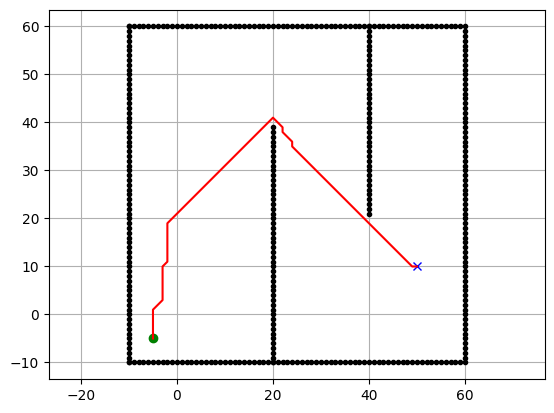

In [11]:
import math
import matplotlib.pyplot as plt
min_set = 10
show_animation = True  # 绘图
 
# 创建一个类
class Dijkstra:
    # 初始化
    def __init__(self, ox, oy, resolution, robot_radius):
        # 属性分配
        self.min_x = None
        self.min_y = None
        self.max_x = None
        self.max_y = None
        self.x_width = None
        self.y_width = None
        self.obstacle_map = None
        
        self.resolution = resolution  # 网格大小(m)
        self.robot_radius = robot_radius  # 
        self.calc_obstacle_map(ox, oy)  # 绘制栅格地图
        self.motion = self.get_motion_model()  # 机器人运动方式
 
    # 构建节点，每个网格代表一个节点
    class Node:
        def __init__(self, x, y, cost, parent_index):
            self.x = x  # 网格索引
            self.y = y
            self.cost = cost  # 路径值
            self.parent_index = parent_index  # 该网格的父节点
        def __str__(self):
            return str(self.x) + ',' + str(self.y) + ',' + str(self.cost) + ',' + str(self.parent_index)
 
    # 寻找最优路径，网格起始坐标(sx,sy)，终点坐标（gx,gy）
    def planning(self, sx, sy, gx, gy):
        # 节点初始化
        # 将已知的起点和终点坐标形式转化为节点类型，0代表路径权重，-1代表无父节点
        start_node = self.Node(self.calc_xy_index(sx, self.min_x),
                               self.calc_xy_index(sy, self.min_y), 0.0, -1)
        # 终点
        goal_node = self.Node(self.calc_xy_index(gx, self.min_x),
                              self.calc_xy_index(gy, self.min_y), 0.0, -1)
        # 保存入库节点和待计算节点
        open_set, closed_set = dict(), dict()
        # 先将起点入库，获取每个网格对应的key
        open_set[self.calc_index(start_node)] = start_node
 
        # 循环
        while 1:
            # 选择扩展点，添加了启发项，f(n)= g(n) + h(n)
            c_id = min(open_set, 
                       key=lambda o: open_set[o].cost + \
                           self.calc_heuristic(goal_node, open_set[o]))
 
            current = open_set[c_id]  # 从字典中取出该节点
 
            # # 绘图
            # if show_animation:
            #     # 网格索引转换为真实坐标
            #     plt.plot(self.calc_position(current.x, self.min_x),
            #              self.calc_position(current.y, self.min_y), 'xc')
            #     plt.pause(0.0001)
            
            # 判断是否是终点，如果选出来的损失最小的点是终点
            if current.x == goal_node.x and current.y == goal_node.y:
                # 更新终点的父节点
                goal_node.cost = current.cost
                # 更新终点的损失
                goal_node.parent_index = current.parent_index
                break
            
            # 在外库中删除该最小损失点，把它入库
            del open_set[c_id]
            closed_set[c_id] = current
 
            # 遍历邻接节点
            for move_x, move_y, move_cost in self.motion:
                # 获取每个邻接节点的节点坐标，到起点的距离，父节点
                node = self.Node(current.x + move_x,
                                 current.y + move_y, 
                                 current.cost + move_cost, c_id)
                # 获取该邻居节点的key
                n_id = self.calc_index(node)
 
                # 如果该节点入库了，就看下一个
                if n_id in closed_set:
                    continue
                
                # 邻居节点是否超出范围了，是否在障碍物上
                if not self.verify_node(node):
                    continue
 
                # 如果该节点不在外库中，就作为一个新节点加入到外库
                if n_id not in open_set:
                    open_set[n_id] = node
                # 节点在外库中时
                else:
                    # 如果该点到起点的距离，要小于外库中该点的距离，就更新外库中的该点信息，更改路径
                    if node.cost <= open_set[n_id].cost:
                        open_set[n_id] = node
            
        # 找到终点
        rx, ry = self.calc_final_path(goal_node, closed_set)
        return rx, ry
 
    # ------------------------------ #
    # A* 的启发函数
    # ------------------------------ #
    @staticmethod
    def calc_heuristic(n1, n2):  # n1终点，n2当前网格
        w = 1.0  # 单个启发函数的权重，如果有多个启发函数，权重可以设置的不一样
        d = w * math.hypot(n1.x-n2.x, n1.y-n2.y)  # 当前网格和终点距离
        return d
 
    # 机器人行走的方式，每次能向周围移动8个网格移动
    @staticmethod
    def get_motion_model():
        # [dx, dy, cost]
        motion = [[1,0,1],  # 右
                  [0,1,1],  # 上
                  [-1,0,1], # 左
                  [0,-1,1], # 下
                  [-1,-1,math.sqrt(2)], # 左下
                  [-1,1,math.sqrt(2)], # 左上
                  [1,-1,math.sqrt(2)], # 右下
                  [1,1,math.sqrt(2)]]  # 右上
        return motion
 
    # 绘制栅格地图
    def calc_obstacle_map(self, ox, oy):
        # 地图边界坐标
        self.min_x = round(min(ox))  # 四舍五入取整
        self.min_y = round(min(oy)) 
        self.max_x = round(max(ox))
        self.max_y = round(max(oy))
        # 地图的x和y方向的栅格个数，长度/每个网格的长度=网格个数
        self.x_width = round((self.max_x-self.min_x)/self.resolution)  # x方向网格个数
        self.y_width = round((self.max_y-self.min_y)/self.resolution)  # y方向网格个数
        # 初始化地图，二维列表，每个网格的值为False
        self.obstacle_map = [[False for _ in range(self.y_width)]
                             for _ in range(self.x_width)]
        # 设置障碍物
        for ix in range(self.x_width):  # 遍历x方向的网格 [0:x_width]
            x = self.calc_position(ix, self.min_x)   # 根据网格索引计算x坐标位置
            for iy in range(self.y_width):  # 遍历y方向的网格 [0:y_width]
                y = self.calc_position(iy, self.min_y)  # 根据网格索引计算y坐标位置
                # 遍历障碍物坐标(实际坐标)
                for iox, ioy in zip(ox, oy):
                    # 计算障碍物和网格点之间的距离
                    d = math.hypot(iox-x, ioy-y)
                    # 膨胀障碍物，如果障碍物和网格之间的距离小，机器人无法通行，对障碍物膨胀
                    if d <= self.robot_radius:
                        # 将障碍物所在网格设置为True
                        self.obstacle_map[ix][iy] = True
                        break  # 每个障碍物膨胀一次就足够了
 
    # 根据网格编号计算实际坐标
    def calc_position(self, index, minp):
        # minp代表起点坐标，左下x或左下y
        pos = minp + index * self.resolution  # 网格点左下左下坐标
        return pos
 
    # 位置坐标转为网格坐标
    def calc_xy_index(self, position, minp):
        # (目标位置坐标-起点坐标)/一个网格的长度==>目标位置的网格索引
        return round((position-minp) / self.resolution)
 
    # 给每个网格编号，得到每个网格的key
    def calc_index(self, node):
        # 从左到右增大，从下到上增大
        return node.y * self.x_width + node.x
 
    # 邻居节点是否超出范围
    def verify_node(self, node):
        # 根据网格坐标计算实际坐标
        px = self.calc_position(node.x, self.min_x)
        py = self.calc_position(node.y, self.min_y)
        # 判断是否超出边界
        if px < self.min_x:
            return False
        if py < self.min_y:
            return False
        if px >= self.max_x:
            return False
        if py >= self.max_y:
            return False
        # 节点是否在障碍物上，障碍物标记为True
        if self.obstacle_map[node.x][node.y]:
            return False
        # 没超过就返回True
        return True
 
 
    # 计算路径, parent属性记录每个节点的父节点
    def calc_final_path(self, goal_node, closed_set):
        # 先存放终点坐标（真实坐标）
        rx = [self.calc_position(goal_node.x, self.min_x)]
        ry = [self.calc_position(goal_node.y, self.min_y)]
        # 获取终点的父节点索引
        parent_index = goal_node.parent_index
        # 起点的父节点==-1 
        while parent_index != -1:
            n = closed_set[parent_index]  # 在入库中选择父节点
            rx.append(self.calc_position(n.x, self.min_x))  # 节点的x坐标
            ry.append(self.calc_position(n.y, self.min_y))  # 节点的y坐标
            parent_index = n.parent_index  # 节点的父节点索引
 
        return rx, ry
 
 
def main():
    # 设置起点和终点
    sx = -5.0
    sy = -5.0
    gx = 50.0
    gy = 10.0
    # 网格大小
    grid_size = 1
    # 机器人半径
    robot_radius = 1.0 
 
    # 设置障碍物位置
    ox, oy = [], []
    for i in range(-10,60):    ox.append(i); oy.append(-10.0)  # 下边界
    for i in range(-10,60):    ox.append(60.0); oy.append(i)  # 右边界
    for i in range(-10,61):    ox.append(i); oy.append(60.0)  # 上边界
    for i in range(-10,61):    ox.append(-10.0); oy.append(i)  # 左边界
    for i in range(-10,40):    ox.append(20.0); oy.append(i)  # 左围栏
    for i in range(0,40):      ox.append(40.0); oy.append(60-i)  # 右围栏
 
    # 绘图
    if show_animation:
        plt.plot(ox, oy, '.k')  # 障碍物黑色
        plt.plot(sx, sy, 'og')  # 起点绿色
        plt.plot(gx, gy, 'xb')  # 终点蓝色
        plt.grid(True)
        plt.axis('equal')  # 坐标轴刻度间距等长
 
    # 实例化，传入障碍物，网格大小
    dijkstra = Dijkstra(ox, oy, grid_size, robot_radius)
    # 求解路径，返回路径的 x 坐标和 y 坐标列表
    rx, ry = dijkstra.planning(sx, sy, gx, gy)
 
    # 绘制路径经过的网格
    if show_animation:
        plt.plot(rx, ry, '-r')
        plt.pause(0.01)
        plt.show()
 
if __name__ == '__main__':
    main()
 